# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.1 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

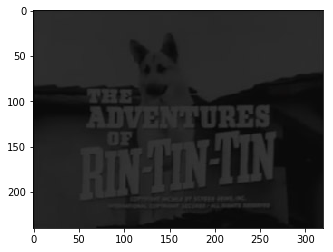

In [3]:
plt.imshow(rintin)

In [4]:
rintin.shape

(240, 320, 3)

In [5]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [6]:
rintin_gray.shape

(240, 320)

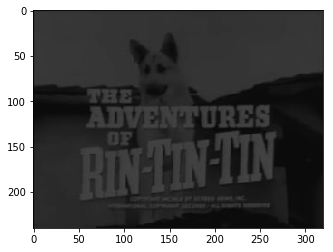

In [7]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

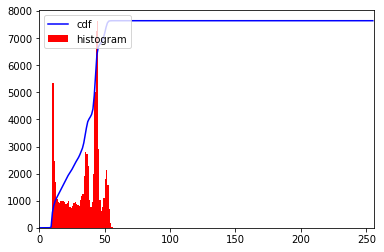

In [8]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

## 1

Não, pois a faixa de cores tem um alcance baixo.

## 2

In [12]:
saida = rintin_gray.copy()

In [13]:
rintin_gray.min()

8

In [14]:
for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        saida[i][j] = rintin_gray[i][j] - 8
    

In [15]:
saida.max()

50

In [16]:
for i in range(saida.shape[0]):
    for j in range(saida.shape[1]):
        saida[i][j] = saida[i][j] * 5.1


## 3

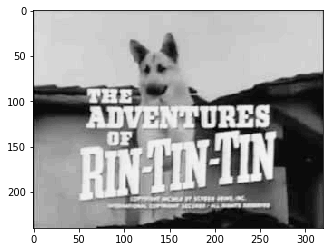

In [17]:
plt.imshow(saida, cmap = 'Greys_r', vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


## 1

In [18]:
canto_sala = cv2.imread('cena_canto_sala.jpg')

In [19]:
canto_sala = cv2.cvtColor(canto_sala, cv2.COLOR_BGR2RGB)

In [20]:
canto_vermelho = canto_sala[:,:,0]

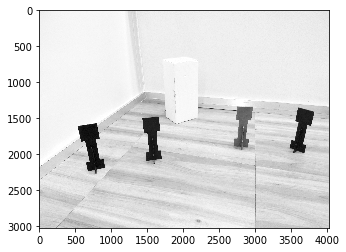

In [21]:
plt.imshow(canto_vermelho, cmap = 'Greys_r')

In [22]:
canto_verde = canto_sala[:,:,1]

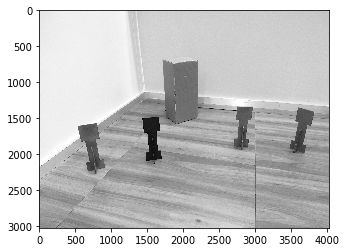

In [23]:
plt.imshow(canto_verde, cmap = 'Greys_r')

In [24]:
canto_azul = canto_sala[:,:,2]

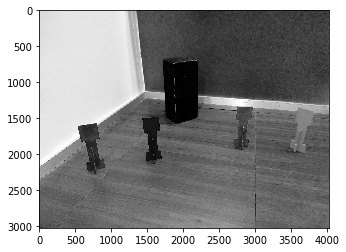

In [25]:
plt.imshow(canto_azul, cmap = 'Greys_r')

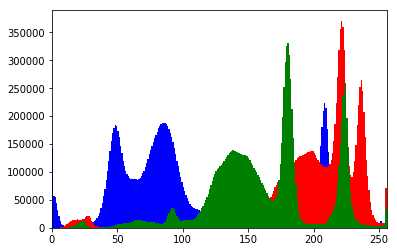

In [26]:
plt.hist(canto_azul.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])

plt.hist(canto_vermelho.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])

plt.hist(canto_verde.flatten(),256,[0,256], color = 'g')
plt.xlim([0,256])

plt.show()

É possivel identificar a caixa vermelha e o creeper azul

In [27]:
img_saida = canto_sala.copy()

for i in range(canto_vermelho.shape[0]):
    for j in range(canto_vermelho.shape[1]):
        if canto_vermelho[i][j] > 250:
            img_saida[i][j] = 255
        else:
            img_saida[i][j] = 0
        

for i in range(canto_azul.shape[0]):
    for j in range(canto_azul.shape[1]):
        if canto_azul[i][j] < 5:
            img_saida[i][j] = 255
        else:
            img_saida[i][j] = 0        


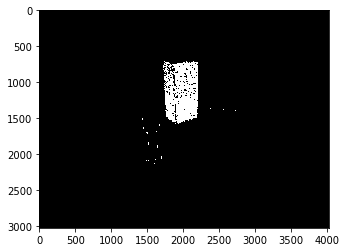

In [28]:
plt.imshow(img_saida, cmap = 'Greys_r')

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

In [31]:
bateriagang = cv2.imread('hall_box_battery_atividade3.png')

In [34]:
bat_sala = cv2.cvtColor(bateriagang, cv2.COLOR_BGR2GRAY)

In [35]:
saidabat = bat_sala.copy()

In [37]:
for i in range(bat_sala.shape[0]-1):
    for j in range(bat_sala.shape[1]-1):
        saidabat[i][j] = abs(int(bat_sala[i][j+1]) - int(bat_sala[i][j-1]))

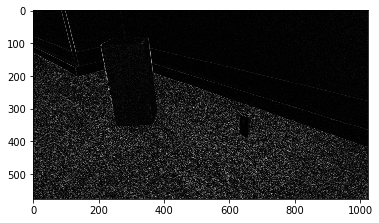

In [38]:
plt.imshow(saidabat, cmap = 'Greys_r')